In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from numpy import array
import warnings
warnings.filterwarnings("ignore")

**Dataset**

In [ ]:
path = '/content/drive/MyDrive/stocks.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


**Missing Values**

In [ ]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


**Number of Unique stocks in Dataset**

In [ ]:
data.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

**Selected stocks and their closing price**

selected stocks are of Apple, Nvidia, Microsoft, and Amazon companies.

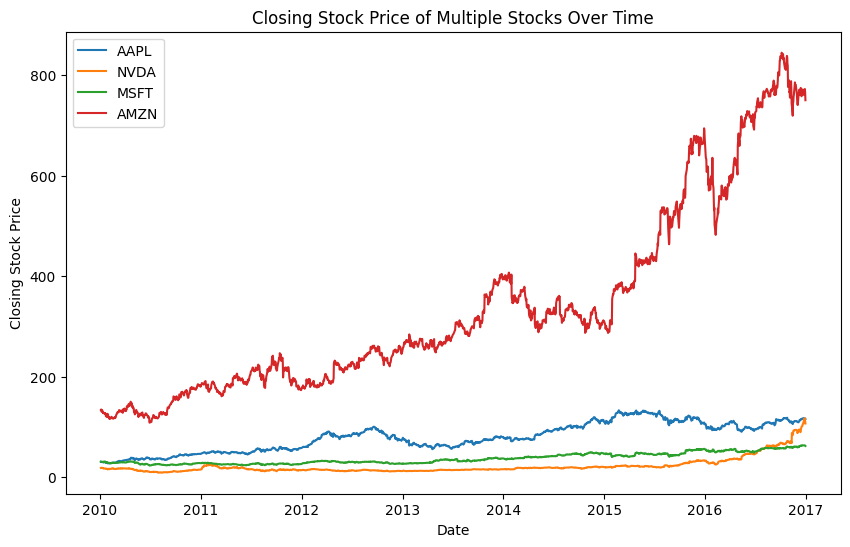

In [ ]:
stocks = ['AAPL', 'NVDA', 'MSFT', 'AMZN']
plt.figure(figsize=(10, 6))
for stock in stocks:
    stock_data = data[data['symbol']==stock]
    sns.lineplot(x='date', y='close', data=stock_data, label=stock)
plt.title('Closing Stock Price of Multiple Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()

**Volume plot of selected stocks**

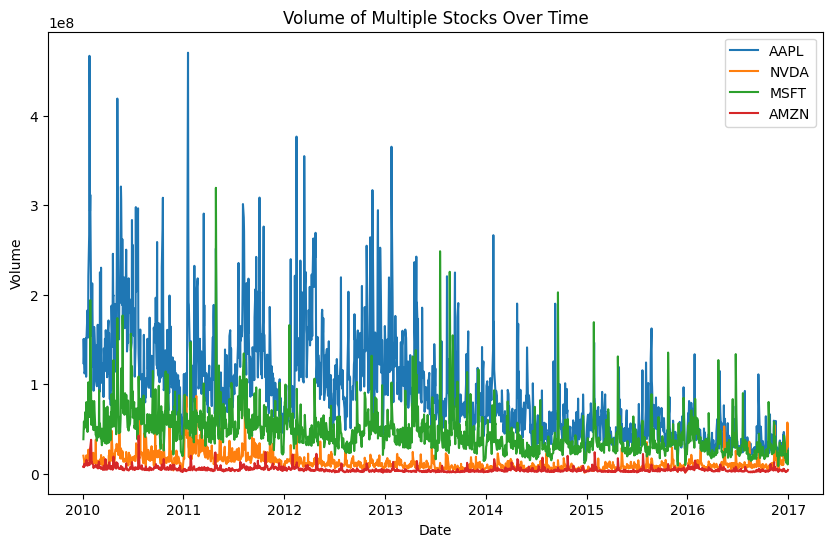

In [ ]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    stock_data = data[data['symbol']==stock]
    sns.lineplot(x='date', y='volume', data=stock_data, label=stock)
plt.title('Volume of Multiple Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

**Apple Stocks**

In [ ]:
AAPL = data[data['symbol'] == 'AAPL']

In [ ]:
AAPL.shape

(1762, 7)

In [ ]:
AAPL['date'] = pd.to_datetime(AAPL['date'])
AAPL.head()

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


**Statistical Description of Apple stock**

In [ ]:
AAPL.describe()

,date,open,close,low,high,volume
count,1762,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,2013-07-02 22:20:17.707150848,79.427744,79.402683,78.640034,80.140447,9.422578e+07
min,2010-01-04 00:00:00,27.481428,27.435715,27.178572,28.000000,1.147590e+07
25%,2011-09-30 18:00:00,55.401787,55.450000,54.672501,55.909286,4.917478e+07
50%,2013-07-04 00:00:00,78.742146,78.435711,77.631428,79.344284,8.050385e+07
75%,2015-04-05 00:00:00,102.979998,103.092503,102.500000,104.424997,1.210816e+08
max,2016-12-30 00:00:00,134.460007,133.000000,131.399994,134.539993,4.702495e+08
std,NaN,28.339001,28.330794,28.108525,28.561027,6.020519e+07


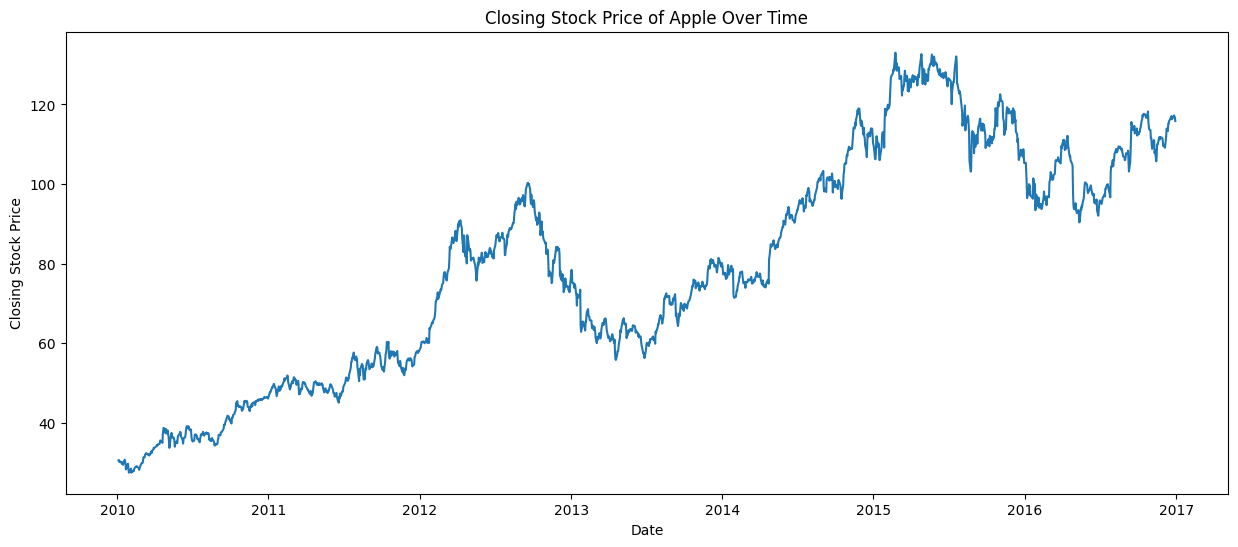

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='close', data=AAPL)
plt.title('Closing Stock Price of Apple Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

We can see stock price of Apple has increased over the years.

In [ ]:
AAPL_1 = AAPL.copy()

In [ ]:
AAPL_1.set_index("date", inplace = True)
AAPL_1.index = pd.to_datetime(AAPL_1.index)

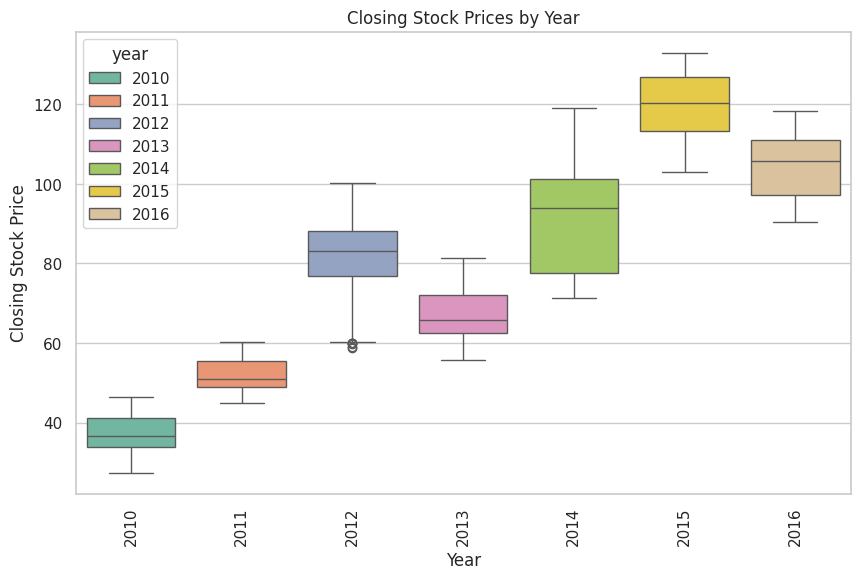

In [ ]:
AAPL_1['year'] = AAPL_1.index.year

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='close', data=AAPL_1, hue='year', palette="Set2", dodge=False)

plt.xticks(rotation=90)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

Stock prices have increased till 2015 and then decreased in 2016. Some outliers are present in 2012.

**Daily Returns**

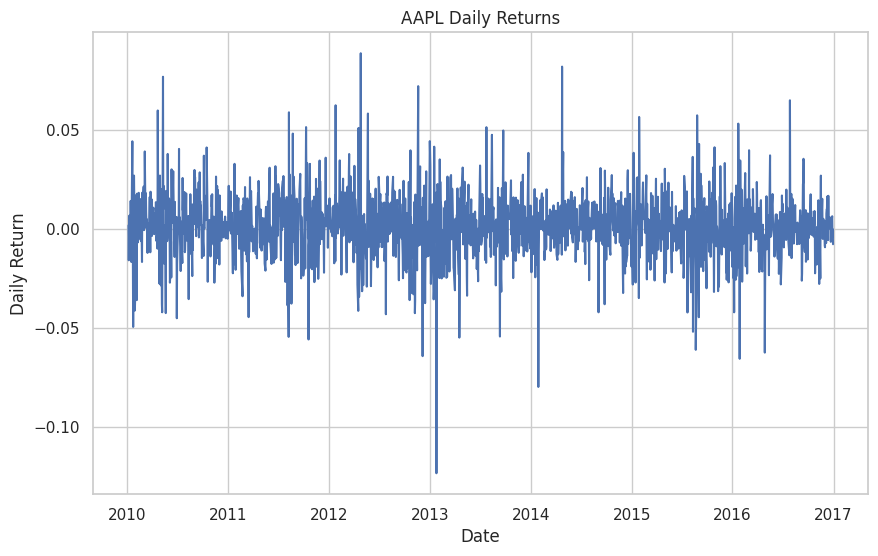

In [ ]:
daily_returns = AAPL_1['close'].pct_change()

plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, daily_returns.values)
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

Daily return refers to the percentage change in the stock's price from one day to the next. It is calculated to measure the daily performance and volatility of a stock. It is not highly volatile as daily returns are close to 0 most of the time.

**Histogram of Apple Daily returns**

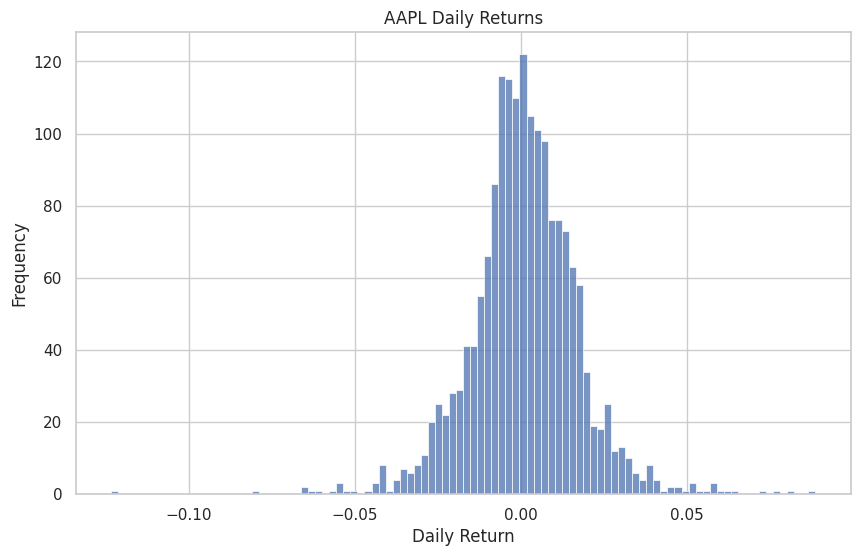

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(AAPL_1['close'].pct_change().dropna(), bins=100)
plt.title('AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

**Simple Moving Average approach to get Buy and Sell signals**

Simple moving average (SMA) function

In [ ]:
def SMA(data, period=30, column='close'):
    return data[column].rolling(window=period).mean()

In [ ]:
AAPL_1['SMA10'] = SMA(AAPL_1, 10)
AAPL_1['SMA50'] = SMA(AAPL_1, 50)

AAPL_1['Signal'] = np.where(AAPL_1['SMA10'] > AAPL_1['SMA50'], 1, 0)
AAPL_1['Position'] = AAPL_1['Signal'].diff()

AAPL_1['Buy'] = np.where(AAPL_1['Position'] == 1, AAPL_1['close'], np.NAN)
AAPL_1['Sell'] = np.where(AAPL_1['Position'] == -1, AAPL_1['close'], np.NAN)

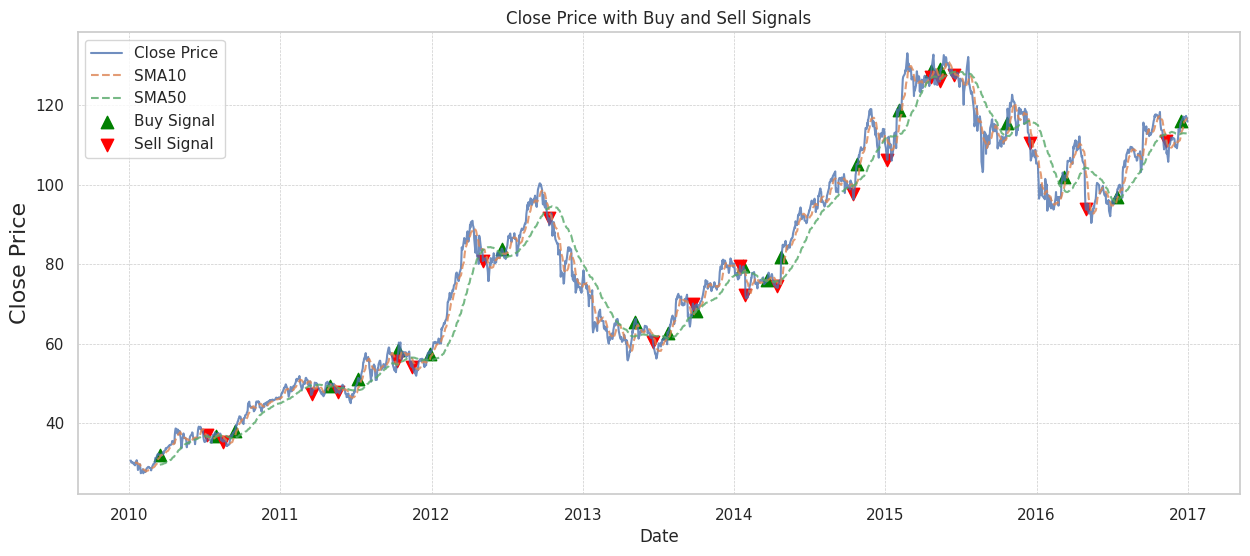

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(AAPL_1['close'], alpha=0.8, label='Close Price', linewidth=1.5)
plt.plot(AAPL_1['SMA10'], alpha=0.8, label='SMA10', linestyle='--', linewidth=1.5)
plt.plot(AAPL_1['SMA50'], alpha=0.8, label='SMA50', linestyle='--', linewidth=1.5)

plt.scatter(AAPL_1.index, AAPL_1['Buy'], alpha=1, label='Buy Signal', marker='^', color='green', edgecolor='green', s=80)
plt.scatter(AAPL_1.index, AAPL_1['Sell'], alpha=1, label='Sell Signal', marker='v', color='red', edgecolor='red', s=80)

plt.title('Close Price with Buy and Sell Signals')
plt.ylabel('Close Price', fontsize=16)
plt.xlabel('Date')
plt.xticks()
plt.yticks()

plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

SMA is used to identify trends in the data and provides a clearer view by smoothing the noise or fluctuations. We generated buy and sell signals using SMA approach on APPLE stocks over the years.

**Apple Data Copy**

In [ ]:
AAPL_df = AAPL.copy()

In [ ]:
AAPL_df = AAPL_df[['date','close']]

In [ ]:
AAPL_stock = AAPL_df.copy()

In [ ]:
AAPL_stock['date'] = pd.to_datetime(AAPL_stock['date'])
AAPL_stock.head()

,date,close
254,2010-01-04,30.572857
721,2010-01-05,30.625713
1189,2010-01-06,30.138571
1657,2010-01-07,30.082857
2125,2010-01-08,30.282858


**Removing 'date' column**

In [ ]:
AAPL_df = AAPL_df.drop(columns=['date'])

**Scaling the Apple close price using MinMaxScaler**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

AAPL_df = scaler.fit_transform(np.array(AAPL_df).reshape(-1,1))

**Splitting the Data into train and test**

In [ ]:
train_size = int(len(AAPL_df) * 0.80)
test_size = len(AAPL_df) - train_size

train_data = AAPL_df[0:train_size, :]
test_data = AAPL_df[train_size:len(AAPL_df), :1]

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1409, 1)
(353, 1)


**Creating Time Series Data**

In [ ]:
def process_data(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        x = dataset[i:(i + time_step), 0]
        X.append(x)

        y = dataset[i + time_step, 0]
        Y.append(y)

    return np.array(X), np.array(Y)

**Generating Training and Testing Data Sequences**

In [ ]:
time_step = 15
X_train, y_train = process_data(train_data, time_step)
X_test, y_test = process_data(test_data, time_step)

In [ ]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(1393, 15) (1393,) (337, 15) (337,)


**Reshaping Data (only for LSTM)**

In [ ]:
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 15, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 15, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

**Model Training**

In [ ]:
model.fit(X_train_lstm, y_train, validation_data = (X_test_lstm,y_test), epochs = 300, batch_size = 32, verbose = 1)

Epoch 1/300
44/44 [==============================] - 3s 60ms/step - loss: 6.9845e-04 - val_loss: 3.3965e-04
Epoch 2/300
44/44 [==============================] - 3s 73ms/step - loss: 6.9554e-04 - val_loss: 4.1960e-04
Epoch 3/300
44/44 [==============================] - 3s 59ms/step - loss: 7.4399e-04 - val_loss: 3.4116e-04
Epoch 4/300
44/44 [==============================] - 2s 46ms/step - loss: 7.8621e-04 - val_loss: 5.4209e-04
Epoch 5/300
44/44 [==============================] - 2s 38ms/step - loss: 6.9619e-04 - val_loss: 3.9016e-04
Epoch 6/300
44/44 [==============================] - 1s 26ms/step - loss: 7.3217e-04 - val_loss: 3.9271e-04
Epoch 7/300
44/44 [==============================] - 1s 26ms/step - loss: 7.6161e-04 - val_loss: 4.5938e-04
Epoch 8/300
44/44 [==============================] - 1s 26ms/step - loss: 7.9601e-04 - val_loss: 3.5213e-04
Epoch 9/300
44/44 [==============================] - 1s 26ms/step - loss: 7.4220e-04 - val_loss: 3.8039e-04
Epoch 10/300
44/44 [========

**Training and Test Predictions**

In [ ]:
train_predict = model.predict(X_train_lstm)
test_predict = model.predict(X_test_lstm)

11/11 [==============================] - 0s 7ms/step


**Inverse Transforming Predictions and Actual Values**

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
ytest = scaler.inverse_transform(y_test.reshape(-1,1))

**LSTM R2 Score**

In [ ]:
train_r2_lstm = r2_score(ytrain, train_predict)
print(f"Train R^2 Score: {train_r2_lstm:.4f}")

Train R^2 Score: 0.9975


In [ ]:
test_r2_lstm = r2_score(ytest, test_predict)
print(f"Test R^2 Score: {test_r2_lstm:.4f}")

Test R^2 Score: 0.9563


**LSTM Root Mean Squared Error (RMSE)**

In [ ]:
train_rmse_lstm = np.sqrt(mean_squared_error(ytrain, train_predict))
print(f"Train RMSE: {train_rmse_lstm:.4f}")

Train RMSE: 1.3526


In [ ]:
test_rmse_lstm = np.sqrt(mean_squared_error(ytest, test_predict))
print(f"Test RMSE: {test_rmse_lstm:.4f}")

Test RMSE: 1.6744


**Plotting Actual and Predicted Close Prices**

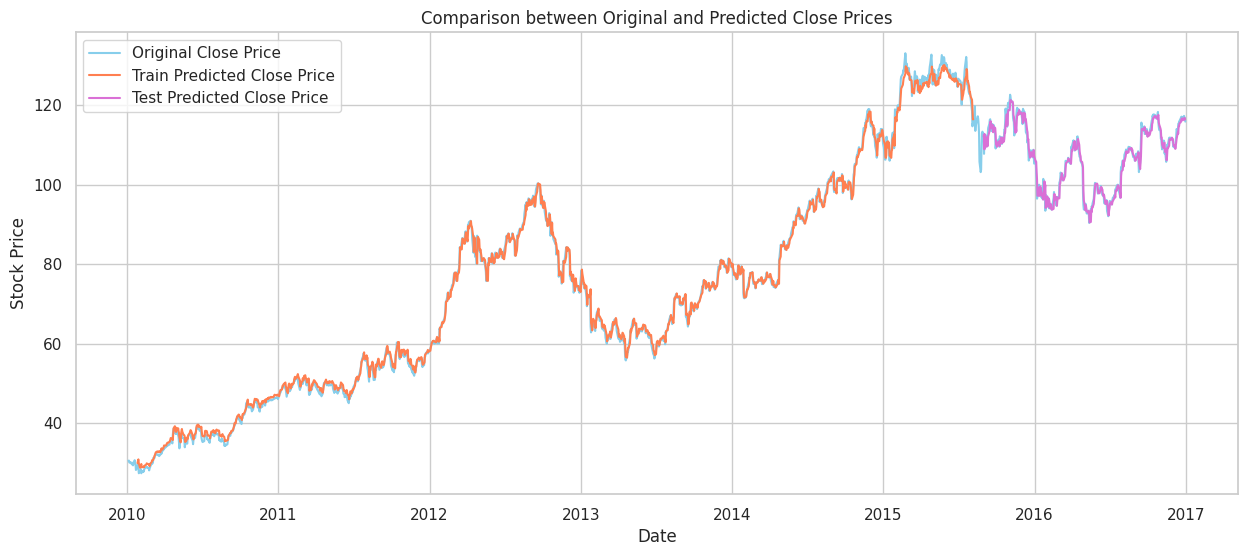

In [ ]:
look_back = time_step
trainPredictPlot = np.empty_like(AAPL_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(AAPL_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(AAPL_df) - 1, :] = test_predict

plotdf = pd.DataFrame({
    'date': AAPL_stock['date'],
    'original_close': AAPL_stock['close'],
    'train_predicted_close': trainPredictPlot.flatten(),
    'test_predicted_close': testPredictPlot.flatten()
})

plt.figure(figsize=(15, 6))
plt.plot(plotdf['date'], plotdf['original_close'], label='Original Close Price', color='skyblue')
plt.plot(plotdf['date'], plotdf['train_predicted_close'], label='Train Predicted Close Price', color='coral')
plt.plot(plotdf['date'], plotdf['test_predicted_close'], label='Test Predicted Close Price', color='orchid')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison between Original and Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

**Support Vector Regression**

In [ ]:
svr_model_1 = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model_1.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

**Training and Test Predictions**

In [ ]:
train_predict_svr = svr_model_1.predict(X_train)
test_predict_svr = svr_model_1.predict(X_test)

train_predict_svr = train_predict_svr.reshape(-1,1)
test_predict_svr = test_predict_svr.reshape(-1,1)

**Inverse Transforming Predictions and Actual Values**

In [ ]:
train_predict_svr = scaler.inverse_transform(train_predict_svr)
test_predict_svr = scaler.inverse_transform(test_predict_svr)

ytrain_svr = scaler.inverse_transform(y_train.reshape(-1,1))
ytest_svr = scaler.inverse_transform(y_test.reshape(-1,1))

**SVR R2 Score**

In [ ]:
train_r2_svr = r2_score(ytrain_svr, train_predict_svr)
print(f"Train R^2 Score: {train_r2_svr:.4f}")

Train R^2 Score: 0.9829


In [ ]:
test_r2_svr = r2_score(ytest_svr, test_predict_svr)
print(f"Test R^2 Score: {test_r2_svr:.4f}")

Test R^2 Score: 0.7405


**SVR RMSE**

In [ ]:
train_rmse_svr = np.sqrt(mean_squared_error(ytrain_svr, train_predict_svr))
print(f"Train RMSE: {train_rmse_svr:.4f}")

Train RMSE: 3.5421


In [ ]:
test_rmse_svr = np.sqrt(mean_squared_error(ytest_svr, test_predict_svr))
print(f"Test RMSE: {test_rmse_svr:.4f}")

Test RMSE: 4.0783


**Plotting Actual and Predicted Close Prices**

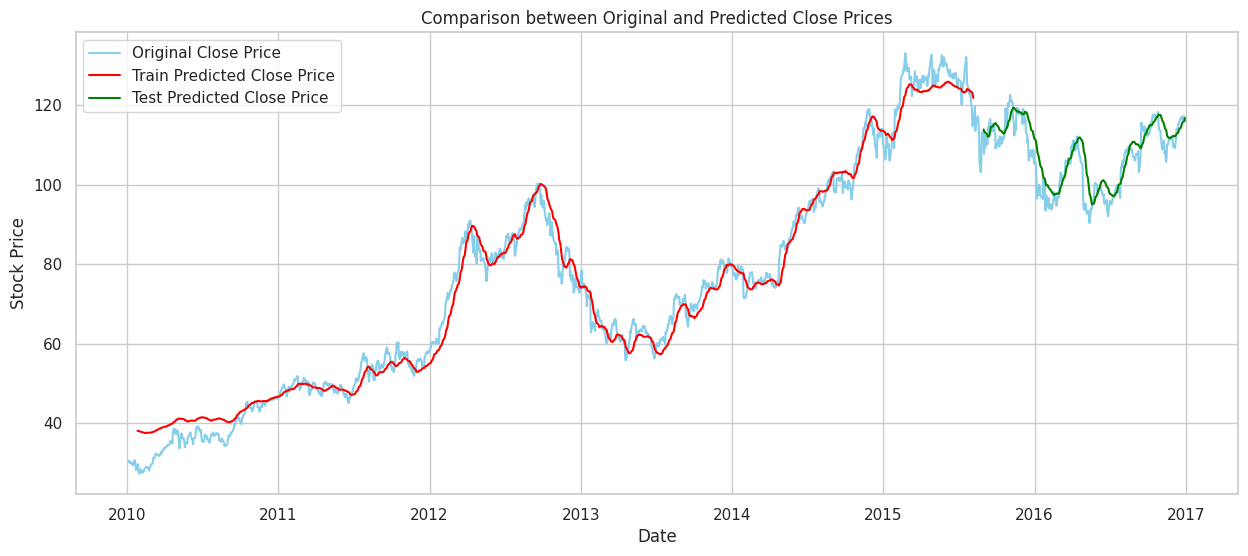

In [ ]:
look_back = time_step
trainPredictPlot_svr = np.empty_like(AAPL_df)
trainPredictPlot_svr[:, :] = np.nan
trainPredictPlot_svr[look_back:len(train_predict_svr) + look_back, :] = train_predict_svr

testPredictPlot_svr = np.empty_like(AAPL_df)
testPredictPlot_svr[:, :] = np.nan
testPredictPlot_svr[len(train_predict_svr) + (look_back * 2) + 1:len(AAPL_df) - 1, :] = test_predict_svr

plotdf = pd.DataFrame({
    'date': AAPL_stock['date'],
    'original_close': AAPL_stock['close'],
    'train_predicted_close': trainPredictPlot_svr.flatten(),
    'test_predicted_close': testPredictPlot_svr.flatten()
})

plt.figure(figsize=(15, 6))
plt.plot(plotdf['date'], plotdf['original_close'], label='Original Close Price', color='skyblue')
plt.plot(plotdf['date'], plotdf['train_predicted_close'], label='Train Predicted Close Price', color='red')
plt.plot(plotdf['date'], plotdf['test_predicted_close'], label='Test Predicted Close Price', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison between Original and Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

**Random Forest Regressor**

In [ ]:
rf_model_2 = RandomForestRegressor(n_estimators = 500, random_state=42)
rf_model_2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

**Training and Test Predictions**

In [ ]:
train_predict_rf = rf_model_2.predict(X_train)
test_predict_rf = rf_model_2.predict(X_test)

train_predict_rf = train_predict_rf.reshape(-1,1)
test_predict_rf = test_predict_rf.reshape(-1,1)

**Inverse Transforming Predictions and Actual Values**

In [ ]:
train_predict_rf = scaler.inverse_transform(train_predict_rf)
test_predict_rf = scaler.inverse_transform(test_predict_rf)

ytrain_rf = scaler.inverse_transform(y_train.reshape(-1,1))
ytest_rf = scaler.inverse_transform(y_test.reshape(-1,1))

**Random Forest R2 Score**

In [ ]:
train_r2_rf = r2_score(ytrain_rf, train_predict_rf)
print(f"Train R^2 Score: {train_r2_rf:.4f}")

Train R^2 Score: 0.9997


In [ ]:
test_r2_rf = r2_score(ytest_rf, test_predict_rf)
print(f"Test R^2 Score: {test_r2_rf:.4f}")

Test R^2 Score: 0.9320


**Random Forest RMSE**

In [ ]:
train_rmse_rf = np.sqrt(mean_squared_error(ytrain_rf, train_predict_rf))
print(f"Train RMSE: {train_rmse_rf:.4f}")

Train RMSE: 0.4941


In [ ]:
test_rmse_rf = np.sqrt(mean_squared_error(ytest_rf, test_predict_rf))
print(f"Test RMSE: {test_rmse_rf:.4f}")

Test RMSE: 2.0876


**Plotting Actual and Predicted Close Prices**

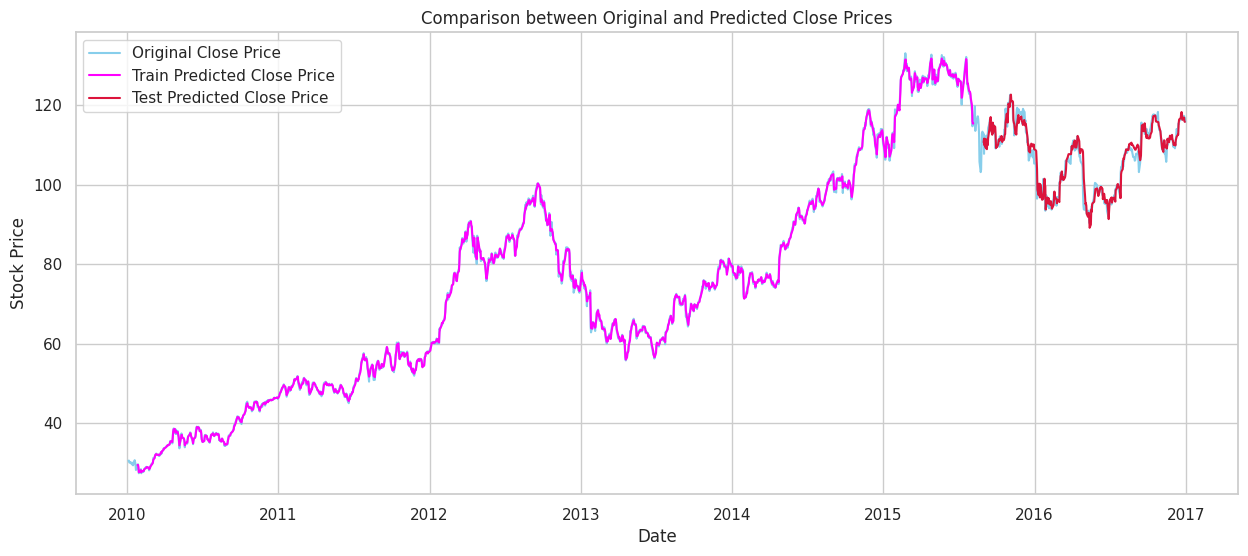

In [ ]:
look_back = time_step
trainPredictPlot_rf = np.empty_like(AAPL_df)
trainPredictPlot_rf[:, :] = np.nan
trainPredictPlot_rf[look_back:len(train_predict_rf) + look_back, :] = train_predict_rf

testPredictPlot_rf = np.empty_like(AAPL_df)
testPredictPlot_rf[:, :] = np.nan
testPredictPlot_rf[len(train_predict_rf) + (look_back * 2) + 1:len(AAPL_df) - 1, :] = test_predict_rf

plotdf = pd.DataFrame({
    'date': AAPL_stock['date'],
    'original_close': AAPL_stock['close'],
    'train_predicted_close': trainPredictPlot_rf.flatten(),
    'test_predicted_close': testPredictPlot_rf.flatten()
})

plt.figure(figsize=(15, 6))
plt.plot(plotdf['date'], plotdf['original_close'], label='Original Close Price', color='skyblue')
plt.plot(plotdf['date'], plotdf['train_predicted_close'], label='Train Predicted Close Price', color='fuchsia')
plt.plot(plotdf['date'], plotdf['test_predicted_close'], label='Test Predicted Close Price', color='crimson')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison between Original and Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

**Test RMSE for Different Models**

In [ ]:
rmse_lstm = np.sqrt(mean_squared_error(ytest, test_predict))
rmse_svm = np.sqrt(mean_squared_error(ytest_svr, test_predict_svr))
rmse_rf = np.sqrt(mean_squared_error(ytest_rf, test_predict_rf))

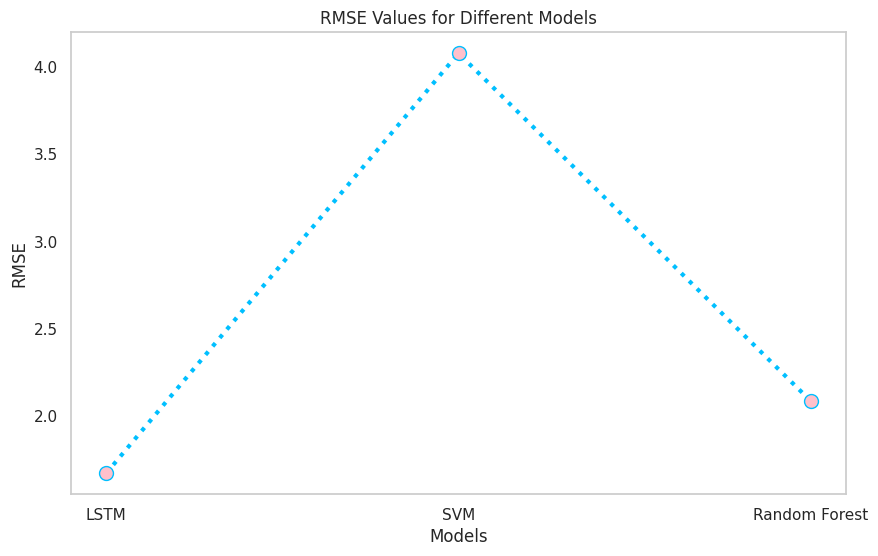

In [ ]:
data_rmse = {
    'Model': ['LSTM', 'SVM', 'Random Forest'],
    'RMSE': [rmse_lstm, rmse_svm, rmse_rf]
}

df_rmse = pd.DataFrame(data_rmse)

plt.figure(figsize=(10, 6))
plt.plot(df_rmse.index, df_rmse['RMSE'], color='deepskyblue', linestyle='dotted', linewidth=3, marker='o', markerfacecolor='pink', markersize=10)
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.title('RMSE Values for Different Models')
plt.xticks(df_rmse.index, df_rmse['Model'])
plt.grid(False)
plt.show()



*   The slight decrease in R² and slight increase in RMSE from train to test suggest a well-fitted model.
*   The large drop in R² and increase in RMSE from train to test indicate that the SVR model is likely overfitting.

*   The nearly perfect train R² score and much lower test R² score suggest that the Random Forest model is overfitting.

**Conclusion:**

The LSTM model performs the best, with high R² scores and low RMSE values for both training and test datasets. In contrast, the Random Forest model overfits, as indicated by its nearly perfect train R² score but significantly lower test R² score. Similarly, the SVR model overfits, evidenced by its performance drop from the training to test datasets and higher RMSE values.





**Predicting next 10 days closing price using LSTM**

In [ ]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

lst_output = []
n_steps = time_step
i = 0
pred_days = 10

while i < pred_days:
    if len(temp_input) > time_step:
        x_input = array(temp_input[1:]).reshape(1, -1).reshape((1, n_steps, 1))

        y_1 = model.predict(x_input, verbose=0)
        temp_input.extend(y_1[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(y_1.tolist())
        i += 1
    else:
        x_input = array(temp_input).reshape((1, n_steps, 1))

        y_1 = model.predict(x_input, verbose=0)
        temp_input.extend(y_1[0].tolist())

        lst_output.extend(y_1.tolist())
        i += 1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


**Plotting last 15 days and 10 predicted days**

In [ ]:
last_days = np.arange(1, time_step + 1)
day_pred = np.arange(time_step + 1, time_step + pred_days + 1)

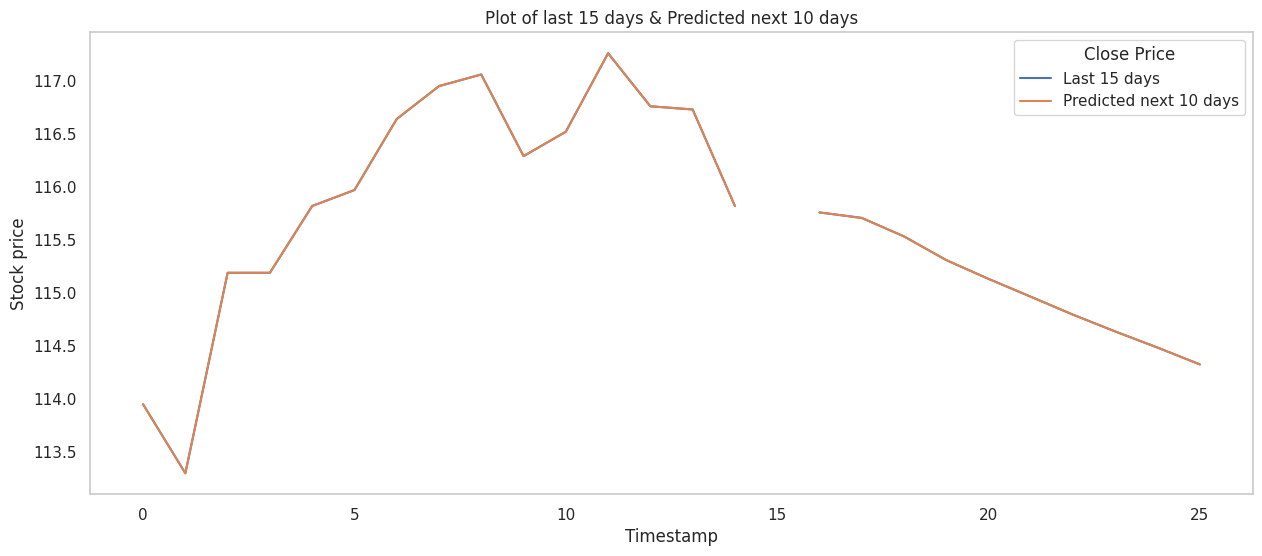

In [ ]:
temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step + 1] = scaler.inverse_transform(AAPL_df[len(AAPL_df) - time_step:]).reshape(1, -1).tolist()[0]
next_predicted_days_value[time_step + 1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

plt.figure(figsize=(15, 6))
plt.plot(new_pred_plot.index, new_pred_plot['last_original_days_value'], label='Last 15 days')
plt.plot(new_pred_plot.index, new_pred_plot['next_predicted_days_value'], label='Predicted next 10 days')

plt.title('Plot of last 15 days & Predicted next 10 days')
plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.legend(title='Close Price')
plt.grid(False)
plt.show()

**Plot to visualize historical closing prices and predicted future prices**

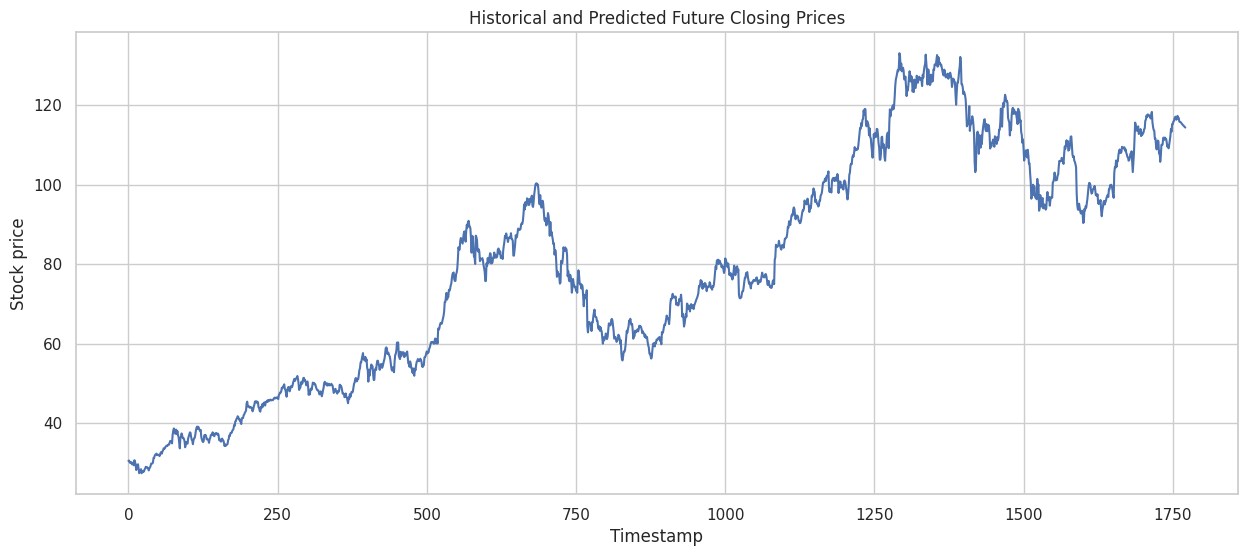

In [ ]:
lstm_df = AAPL_df.tolist()
lstm_df.extend(np.array(lst_output).reshape(-1, 1).tolist())
lstm_df = scaler.inverse_transform(lstm_df).reshape(1, -1).tolist()[0]

plt.figure(figsize=(15, 6))
plt.plot(lstm_df, label='Close price')

plt.title('Historical and Predicted Future Closing Prices')
plt.xlabel('Timestamp')
plt.ylabel('Stock price')
plt.grid(True)
plt.show()